In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import files
import pandas as pd

# Step 1: Upload the CSV file
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
df =pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [10]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,False,True,False
9275,427,42,1,75681.52,1,1,1,57098.00,True,False,True
2995,535,29,2,112367.34,1,1,0,185630.76,False,False,False
5316,654,40,5,105683.63,1,1,0,173617.09,False,True,True
356,850,57,8,126776.30,2,1,1,132298.49,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,True,False,False
4859,794,22,4,114440.24,1,1,1,107753.07,False,True,False
3264,738,35,5,161274.05,2,1,0,181429.87,False,False,True
9845,590,38,9,0.00,2,1,1,148750.16,False,True,False


In [16]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,597,35,8,131101.04,1,1,1,192852.67,True,False,False
898,523,40,2,102967.41,1,1,0,128702.10,False,False,False
2398,706,42,8,95386.82,1,1,1,75732.25,False,True,False
5906,788,32,4,112079.58,1,0,0,89368.59,False,False,True
2343,706,38,5,163034.82,2,1,1,135662.17,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,False,False,False
2899,586,35,7,0.00,2,1,0,70760.69,False,False,False
9549,578,36,1,157267.95,2,1,0,141533.19,False,True,True
2740,650,34,4,142393.11,1,1,1,11276.48,True,False,True


In [17]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [20]:
y_test

array([0, 1, 0, ..., 0, 0, 0])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 408 (1.59 KB)

 Trainable params: 408 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4780 - loss: 0.7115
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7951 - loss: 0.5027
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4985
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7890 - loss: 0.4848
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7897 - loss: 0.4561
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8017 - loss: 0.4360
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8163 - loss: 0.4245
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8072 - loss: 0.4336
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8080 - loss: 0.4343
Epoch 10/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8227 - loss: 0.4274
Epoch 11/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8161 - loss: 0.4300
Epoch 12/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [27]:
model.fit(X_train_scaled,y_train,epochs=100,verbose=1)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8380 - loss: 0.3942
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8395 - loss: 0.3988
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8359 - loss: 0.3990
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8372 - loss: 0.3955
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.3986
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8388 - loss: 0.3930
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8367 - loss: 0.3969
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8363 - loss: 0.3972
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8406 - loss: 0.3977
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8410 - loss: 0.3923
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8411 - loss: 0.3879
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

In [34]:
model2 = Sequential()

model2.add(Dense(11,activation='relu',input_dim=11))
model2.add(Dense(11,activation='relu'))
model2.add(Dense(11,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [35]:
model2.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
model2.fit(X_train_scaled,y_train,epochs=10,verbose=1)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8526 - loss: 0.3519
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8556 - loss: 0.3442
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8505 - loss: 0.3449
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8546 - loss: 0.3488
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8582 - loss: 0.3408
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8639 - loss: 0.3358
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.3359
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.3408
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8583 - loss: 0.3330
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8575 - loss: 0.3361


In [38]:
history = model.fit(X_train_scaled,y_train,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8622 - loss: 0.3277 - val_accuracy: 0.8656 - val_loss: 0.3369
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8664 - loss: 0.3230 - val_accuracy: 0.8656 - val_loss: 0.3372
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8602 - loss: 0.3366 - val_accuracy: 0.8650 - val_loss: 0.3373
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8634 - loss: 0.3264 - val_accuracy: 0.8656 - val_loss: 0.3406
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8647 - loss: 0.3206 - val_accuracy: 0.8656 - val_loss: 0.3384
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.3210 - val_accuracy: 0.8662 - val_loss: 0.3392
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8658 - loss: 0.3252 - val_accuracy: 0.8637 - val_loss: 0.3396
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8664 - loss: 0.3227 - val_accuracy: 0.

In [39]:
model.layers[0].get_weights()

[array([[ 1.78892612e-01,  4.33629081e-02, -2.04350010e-01,
         -6.61442354e-02, -4.91818823e-02,  5.68513498e-02,
          7.33110756e-02,  1.93542585e-01,  2.39198714e-01,
         -2.43953481e-01, -3.32801312e-01],
        [-2.38591981e+00, -7.09637463e-01, -2.68270850e+00,
          3.38083446e-01,  5.88680089e-01, -1.05441578e-01,
          4.91860420e-01, -1.47164738e+00,  5.92904389e-01,
         -2.37353969e+00,  5.69774568e-01],
        [ 1.04551829e-01, -5.38669080e-02, -5.12286246e-01,
          2.92983443e-01,  2.41206780e-01,  9.32049677e-02,
         -7.29977712e-02,  1.79817393e-01,  4.54349309e-01,
         -2.31635436e-01,  4.74613905e-02],
        [ 5.15243530e-01, -6.40592128e-02, -8.31499934e-01,
          1.11598790e+00, -2.20664755e-01,  7.49721229e-01,
          2.06104979e-01,  1.52063623e-01, -1.33428252e+00,
         -8.38954926e-01, -1.74294218e-01],
        [-2.63159752e-01,  4.98962075e-01,  2.25077331e-01,
         -5.23786008e-01, -2.51372409e+00,  

In [40]:
model.layers[1].get_weights()

[array([[ 0.4967015 , -0.52047217,  1.1934143 ,  0.7295679 ,  1.6399078 ,
          1.6698483 , -0.83272874,  1.4086514 ,  0.71572864, -0.33495346,
          1.1759385 ],
        [-1.1284722 ,  0.30165768, -0.5148675 , -0.4358098 , -1.0154389 ,
         -0.825278  ,  0.8995057 , -0.6805787 , -1.0385699 ,  0.9756699 ,
         -0.5415315 ],
        [ 0.42805728,  0.37072173,  0.506954  ,  0.34601328,  0.80314124,
          0.19602159, -0.20546578, -0.13239796,  0.19138743,  0.15648396,
          0.7889788 ],
        [-0.48433745, -1.1274651 ,  0.5461989 ,  0.7146754 , -0.06714679,
          0.19855256, -0.5820905 ,  0.17358583,  0.71551067, -0.10651101,
          0.4908345 ],
        [-2.3475888 ,  1.4293667 , -1.0894753 , -1.2195221 , -0.36575675,
         -0.8130602 ,  1.0809133 , -1.2813162 , -0.7814668 ,  1.0927017 ,
         -1.1145202 ],
        [-0.71182215,  0.92676   , -1.932182  , -0.98914534, -1.410712  ,
         -2.0943732 ,  1.2503606 , -1.4145124 , -1.6997453 ,  1.7192156

In [41]:
model.layers[2].get_weights()

[array([[ 0.6970744 , -1.108135  , -0.5599247 ,  0.45971596,  1.1240418 ,
         -1.0650246 ,  0.95616615,  1.3480966 ,  0.61304075,  0.7341107 ,
         -0.2754465 ],
        [-0.92473716,  0.9519072 ,  1.4458396 , -1.297105  , -1.4710038 ,
          1.2441515 , -1.0994247 , -1.3287822 , -1.3355051 , -1.2555147 ,
          1.2762629 ],
        [ 1.0970132 , -0.41960886, -0.81328994,  0.65414596,  0.5189286 ,
         -0.60244375,  0.4633368 ,  0.18412419,  0.22175473,  0.76852846,
         -0.42959204],
        [ 0.2217985 ,  0.06552665, -0.67956   ,  0.33530527,  0.07434492,
         -0.4508203 ,  0.00363005, -0.09308621,  0.82664245, -0.19476359,
         -0.28880456],
        [ 0.2612854 , -0.50749373, -0.10462285,  0.17284575,  0.10605178,
         -0.29623002,  0.8312722 ,  0.50194013,  0.48958153,  0.70945334,
         -0.957702  ],
        [ 0.6478029 , -1.0668548 , -0.59560424,  0.7420454 ,  1.3161377 ,
         -0.91915774,  1.1595007 ,  0.6773581 ,  0.7022282 ,  0.6397654

In [42]:
ylog= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [43]:
y_pred= np.where(ylog > 0.5,1,0)

In [44]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

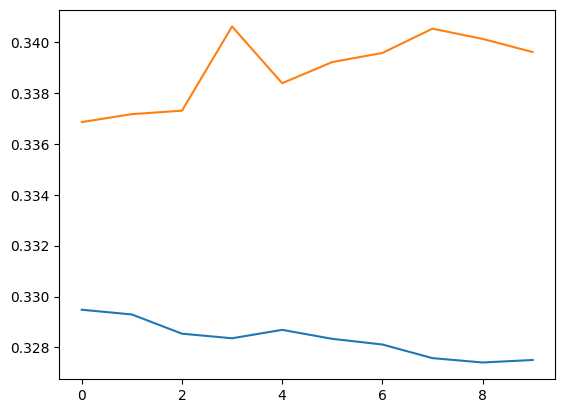

In [46]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

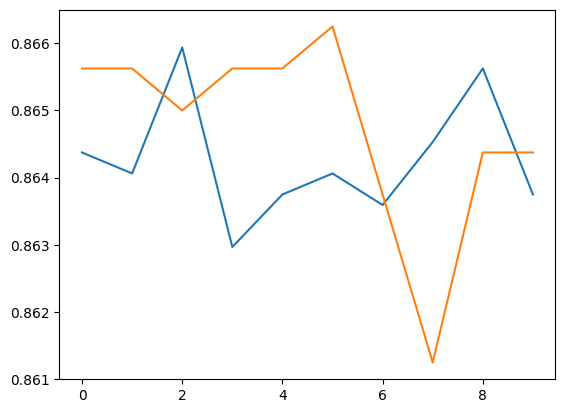

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])